In [94]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/gonzamonas/anaconda3/bin/python (found version "3.7.6") 
-- Found PythonLibs: /home/gonzamonas/anaconda3/lib/libpython3.7m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/gonzamonas/Desktop/mn-tp3/tp3
-- Configuring done
-- Genera

In [95]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python3 --version #le agregué el 3 para que ande en mi pc
import sys
sys.path.append('/home/dante/Documents/metnum tps again/mn-tp3/tp3/metnum3/lib/python3.8/site-packages')
import metnum
import numpy as np
import matplotlib.pyplot as plt

/home/gonzamonas/Desktop/mn-tp3/tp3/notebooks
Python 3.7.6


In [96]:
#import sys
#sys.path.append('/home/dante/Documents/metnum tps again/mn-tp3/tp3/metnum3/lib/python3.8/site-packages')
import pandas as pd
import seaborn as sns
from utils import run_analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [97]:
df_orig = pd.read_csv("../dataset-folder/expectativa_de_vida.csv")
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

In [98]:
df_orig = df_orig.drop('Unnamed: 0', 1)
df_orig = df_orig.fillna(df_orig.median())
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Life expectancy                  183 non-null    float64
 2   Adult Mortality                  183 non-null    float64
 3   infant deaths                    183 non-null    float64
 4   Alcohol                          183 non-null    float64
 5   percentage expenditure           183 non-null    float64
 6   Hepatitis B                      183 non-null    float64
 7   Measles                          183 non-null    float64
 8   BMI                              183 non-null    float64
 9   under-five deaths                183 non-null    float64
 10  Polio                            183 non-null    float64
 11  Total expenditure                183 non-null    float64
 12  Diphtheria            

In [99]:
df_orig['logGDP'] = np.log(df_orig['GDP'])

In [100]:
columnas = df_orig.columns.to_list()
columnas.remove('Country')
columnas.remove('Life expectancy')
columnas.remove('Status')

In [101]:
df = df_orig.copy()

In [102]:
for columna in columnas:
    df[columna] = (df[columna]-np.mean(df[columna]))/np.std(df[columna])

In [103]:
df.corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,logGDP
Life expectancy,1.000000,-0.896441,-0.199914,0.460338,0.524320,0.424982,-0.201076,0.712117,-0.225785,0.679231,0.288134,0.672322,-0.587153,0.572807,-0.048532,-0.514356,-0.507002,0.777659,0.756699,0.762051
Adult Mortality,-0.896441,1.000000,0.099440,-0.286186,-0.424081,-0.323565,0.098834,-0.609512,0.119620,-0.531039,-0.189767,-0.511538,0.696999,-0.476087,0.003835,0.402323,0.405641,-0.617743,-0.575950,-0.612657
infant deaths,-0.199914,0.099440,1.000000,-0.122681,-0.117735,-0.302109,0.711078,-0.285870,0.996959,-0.241408,-0.166771,-0.240281,0.024589,-0.137075,0.893373,0.511223,0.514146,-0.157516,-0.198099,-0.194137
Alcohol,0.460338,-0.286186,-0.122681,1.000000,0.465238,0.158400,-0.087982,0.447160,-0.119928,0.358592,0.424819,0.342223,-0.087220,0.439916,-0.044345,-0.500129,-0.485756,0.529341,0.584941,0.565655
percentage expenditure,0.524320,-0.424081,-0.117735,0.465238,1.000000,0.053111,-0.110970,0.361802,-0.120997,0.290563,0.237425,0.273418,-0.147532,0.942968,-0.046727,-0.363125,-0.365292,0.571490,0.550635,0.697302
Hepatitis B,0.424982,-0.323565,-0.302109,0.158400,0.053111,1.000000,-0.269598,0.288556,-0.316781,0.786280,0.151571,0.788851,-0.187507,0.127550,-0.209721,-0.217887,-0.226417,0.322994,0.374394,0.276712
Measles,-0.201076,0.098834,0.711078,-0.087982,-0.110970,-0.269598,1.000000,-0.309800,0.719636,-0.239703,-0.169604,-0.258502,0.034536,-0.127112,0.470007,0.315772,0.315019,-0.126524,-0.152123,-0.159427
BMI,0.712117,-0.609512,-0.285870,0.447160,0.361802,0.288556,-0.309800,1.000000,-0.299249,0.492030,0.382968,0.480829,-0.339924,0.424606,-0.142126,-0.714949,-0.717634,0.632331,0.655377,0.664430
under-five deaths,-0.225785,0.119620,0.996959,-0.119928,-0.120997,-0.316781,0.719636,-0.299249,1.000000,-0.267112,-0.168763,-0.267143,0.037544,-0.141815,0.878088,0.512822,0.514272,-0.176865,-0.213797,-0.206488
Polio,0.679231,-0.531039,-0.241408,0.358592,0.290563,0.786280,-0.239703,0.492030,-0.267112,1.000000,0.238479,0.945657,-0.245211,0.362371,-0.106706,-0.348941,-0.341646,0.574446,0.605035,0.545508


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

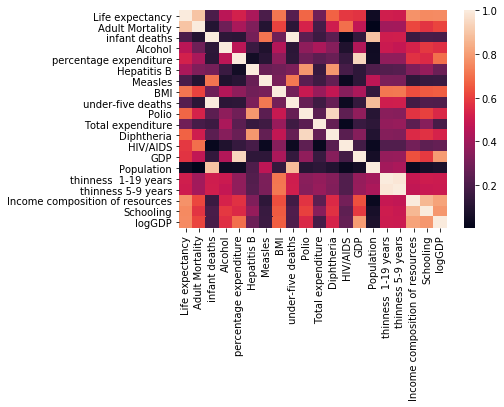

In [105]:
sns.heatmap(abs(df.corr()))
plt.savefig("heatmap_corr.png", bbox_inches='tight')

In [106]:
import numpy as np

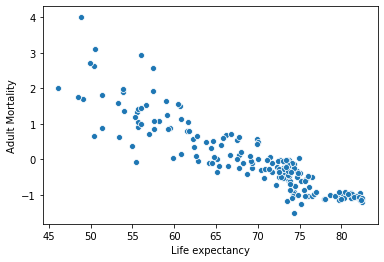

In [107]:
sns.scatterplot(data = df, x = "Life expectancy", y = 'Adult Mortality')

In [108]:
correlaciones = abs(df.corr()['Life expectancy'])
correlaciones = correlaciones.sort_values(ascending=False)

In [109]:
correlaciones

Life expectancy                    1.000000
Adult Mortality                    0.896441
Income composition of resources    0.777659
logGDP                             0.762051
Schooling                          0.756699
BMI                                0.712117
Polio                              0.679231
Diphtheria                         0.672322
HIV/AIDS                           0.587153
GDP                                0.572807
percentage expenditure             0.524320
thinness  1-19 years               0.514356
thinness 5-9 years                 0.507002
Alcohol                            0.460338
Hepatitis B                        0.424982
Total expenditure                  0.288134
under-five deaths                  0.225785
Measles                            0.201076
infant deaths                      0.199914
Population                         0.048532
Name: Life expectancy, dtype: float64

In [110]:
df.corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,logGDP
Life expectancy,1.000000,-0.896441,-0.199914,0.460338,0.524320,0.424982,-0.201076,0.712117,-0.225785,0.679231,0.288134,0.672322,-0.587153,0.572807,-0.048532,-0.514356,-0.507002,0.777659,0.756699,0.762051
Adult Mortality,-0.896441,1.000000,0.099440,-0.286186,-0.424081,-0.323565,0.098834,-0.609512,0.119620,-0.531039,-0.189767,-0.511538,0.696999,-0.476087,0.003835,0.402323,0.405641,-0.617743,-0.575950,-0.612657
infant deaths,-0.199914,0.099440,1.000000,-0.122681,-0.117735,-0.302109,0.711078,-0.285870,0.996959,-0.241408,-0.166771,-0.240281,0.024589,-0.137075,0.893373,0.511223,0.514146,-0.157516,-0.198099,-0.194137
Alcohol,0.460338,-0.286186,-0.122681,1.000000,0.465238,0.158400,-0.087982,0.447160,-0.119928,0.358592,0.424819,0.342223,-0.087220,0.439916,-0.044345,-0.500129,-0.485756,0.529341,0.584941,0.565655
percentage expenditure,0.524320,-0.424081,-0.117735,0.465238,1.000000,0.053111,-0.110970,0.361802,-0.120997,0.290563,0.237425,0.273418,-0.147532,0.942968,-0.046727,-0.363125,-0.365292,0.571490,0.550635,0.697302
Hepatitis B,0.424982,-0.323565,-0.302109,0.158400,0.053111,1.000000,-0.269598,0.288556,-0.316781,0.786280,0.151571,0.788851,-0.187507,0.127550,-0.209721,-0.217887,-0.226417,0.322994,0.374394,0.276712
Measles,-0.201076,0.098834,0.711078,-0.087982,-0.110970,-0.269598,1.000000,-0.309800,0.719636,-0.239703,-0.169604,-0.258502,0.034536,-0.127112,0.470007,0.315772,0.315019,-0.126524,-0.152123,-0.159427
BMI,0.712117,-0.609512,-0.285870,0.447160,0.361802,0.288556,-0.309800,1.000000,-0.299249,0.492030,0.382968,0.480829,-0.339924,0.424606,-0.142126,-0.714949,-0.717634,0.632331,0.655377,0.664430
under-five deaths,-0.225785,0.119620,0.996959,-0.119928,-0.120997,-0.316781,0.719636,-0.299249,1.000000,-0.267112,-0.168763,-0.267143,0.037544,-0.141815,0.878088,0.512822,0.514272,-0.176865,-0.213797,-0.206488
Polio,0.679231,-0.531039,-0.241408,0.358592,0.290563,0.786280,-0.239703,0.492030,-0.267112,1.000000,0.238479,0.945657,-0.245211,0.362371,-0.106706,-0.348941,-0.341646,0.574446,0.605035,0.545508


In [111]:
df_enf = df[['Polio', 'Measles', 'HIV/AIDS', 'Diphtheria', 'Hepatitis B']]

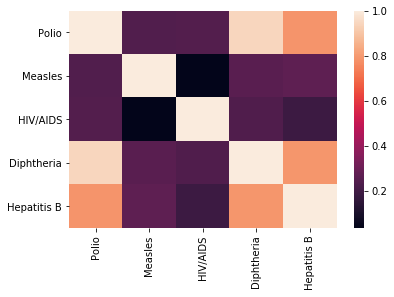

In [112]:
sns.heatmap(abs(df_enf.corr()))

In [113]:
df_enf2 = df_enf[['Polio', 'Diphtheria', 'Hepatitis B']]

In [114]:
df_econ = df[['Schooling','percentage expenditure','GDP','Income composition of resources']]

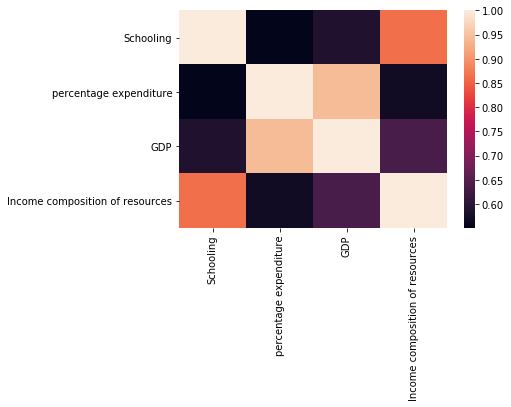

In [115]:
sns.heatmap(abs(df_econ.corr()))

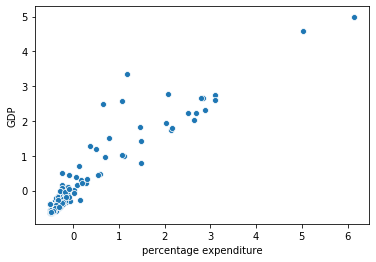

In [116]:
sns.scatterplot(data = df, x = "percentage expenditure", y = 'GDP')

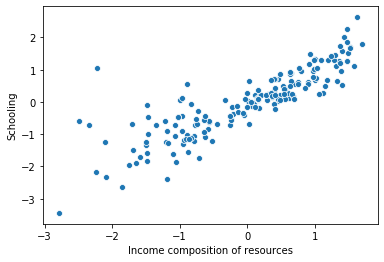

In [117]:
sns.scatterplot(data = df, x = "Income composition of resources", y = 'Schooling')

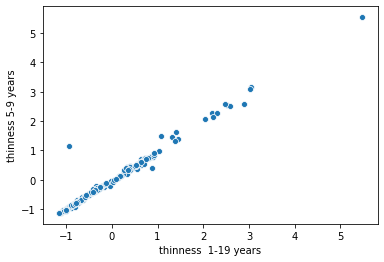

In [118]:
sns.scatterplot(data = df, x = "thinness  1-19 years", y = 'thinness 5-9 years')

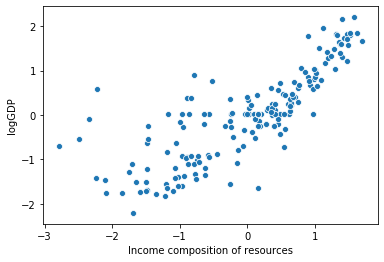

In [119]:
s = sns.scatterplot(data = df, x = "Income composition of resources", y = 'logGDP')


# Analisis de regresores

In [120]:
import statsmodels.api as sm

In [121]:
ys = df['Life expectancy']

In [122]:
xs = df.drop('Life expectancy', axis=1)

In [123]:
correlaciones

Life expectancy                    1.000000
Adult Mortality                    0.896441
Income composition of resources    0.777659
logGDP                             0.762051
Schooling                          0.756699
BMI                                0.712117
Polio                              0.679231
Diphtheria                         0.672322
HIV/AIDS                           0.587153
GDP                                0.572807
percentage expenditure             0.524320
thinness  1-19 years               0.514356
thinness 5-9 years                 0.507002
Alcohol                            0.460338
Hepatitis B                        0.424982
Total expenditure                  0.288134
under-five deaths                  0.225785
Measles                            0.201076
infant deaths                      0.199914
Population                         0.048532
Name: Life expectancy, dtype: float64


Income composition of resources


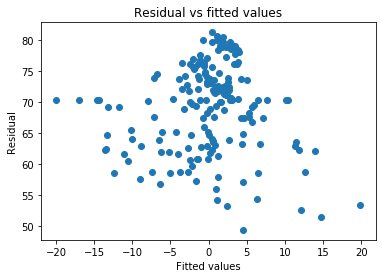

R2: [0.60475395]
R2 ajustado: [0.60257027]
RSE: [5.79131289]

logGDP


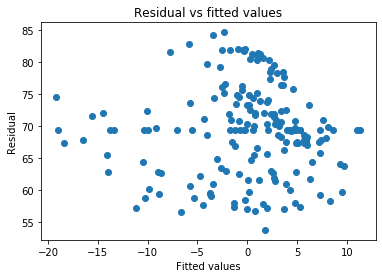

R2: [0.5807216]
R2 ajustado: [0.57840514]
RSE: [5.96478103]

Schooling


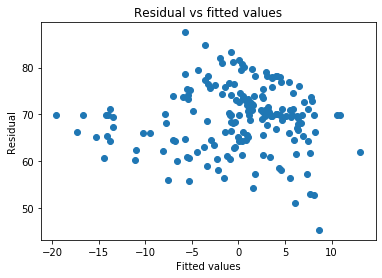

R2: [0.5725934]
R2 ajustado: [0.57023204]
RSE: [6.02232057]

BMI


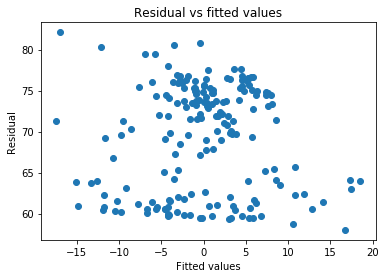

R2: [0.50711048]
R2 ajustado: [0.50438733]
RSE: [6.46722622]

Polio


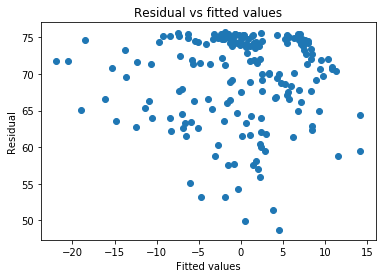

R2: [0.46135528]
R2 ajustado: [0.45837934]
RSE: [6.76074357]

Diphtheria


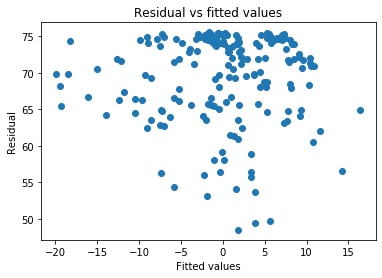

R2: [0.45201672]
R2 ajustado: [0.44898919]
RSE: [6.81909771]

HIV/AIDS


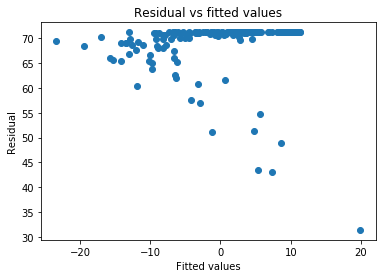

R2: [0.34474912]
R2 ajustado: [0.34112895]
RSE: [7.45670677]

GDP


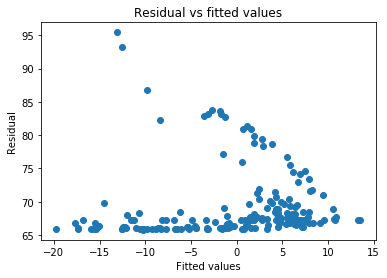

R2: [0.32810742]
R2 ajustado: [0.3243953]
RSE: [7.55080373]

percentage expenditure


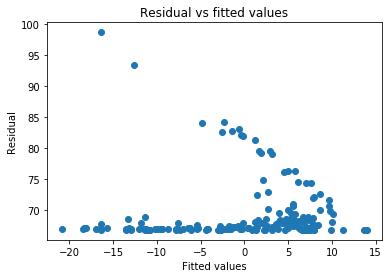

R2: [0.27491103]
R2 ajustado: [0.27090502]
RSE: [7.84402388]

thinness 5-9 years


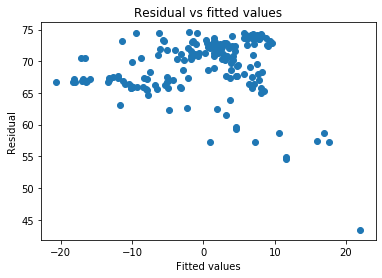

R2: [0.25705053]
R2 ajustado: [0.25294584]
RSE: [7.94004378]


In [124]:
variablesV1 = ['Income composition of resources', 'logGDP', 'Schooling', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'percentage expenditure', 'thinness 5-9 years']

for variable in variablesV1:
    print('')
    print(variable)
    run_analysis(xs[[variable]], ys.values.reshape(-1, 1))


## V2


ICR y logGDP


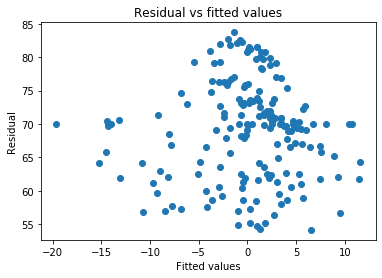

R2: [0.6543444]
R2 ajustado: [0.65050378]
RSE: [5.41583044]
VIF: 2.954142842383476

ICR y Schooling


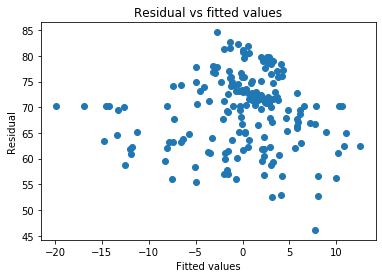

R2: [0.63308626]
R2 ajustado: [0.62900944]
RSE: [5.57988498]
VIF: 3.947608876190148

ICR y BMI


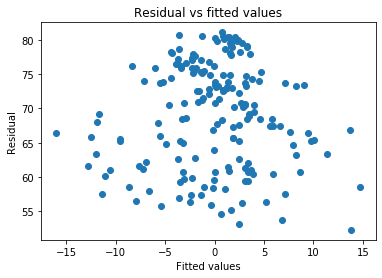

R2: [0.68567736]
R2 ajustado: [0.68218489]
RSE: [5.1645334]
VIF: 1.6662297791254572

ICR y Polio


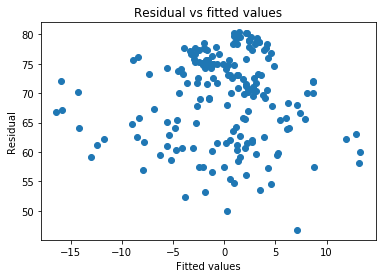

R2: [0.68543908]
R2 ajustado: [0.68194396]
RSE: [5.16649057]
VIF: 1.4925114035566776

ICR y Diphtheria


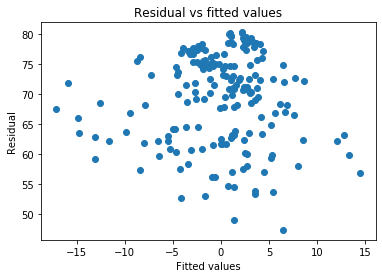

R2: [0.68989769]
R2 ajustado: [0.68645211]
RSE: [5.1297448]
VIF: 1.4372345321048865

ICR y HIV/AIDS


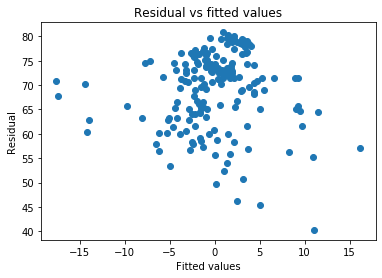

R2: [0.74276834]
R2 ajustado: [0.73991021]
RSE: [4.67202835]
VIF: 1.0983151726267786

ICR y GDP


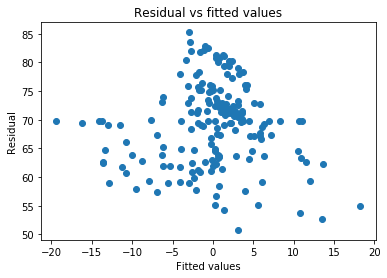

R2: [0.61475814]
R2 ajustado: [0.61047767]
RSE: [5.71755032]
VIF: 1.6845895421491075

ICR y percentage expenditure


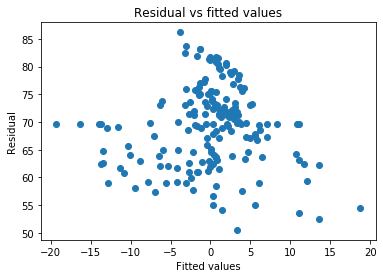

R2: [0.61423309]
R2 ajustado: [0.60994679]
RSE: [5.72144522]
VIF: 1.4850027996131403

ICR y thinness  1-19 years


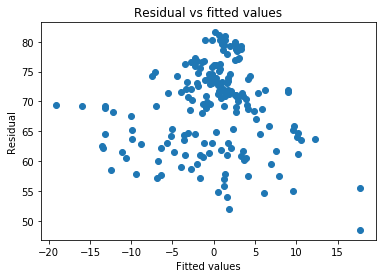

R2: [0.62835579]
R2 ajustado: [0.62422641]
RSE: [5.61573938]
VIF: 1.3144477097469065

ICR y Alcohol


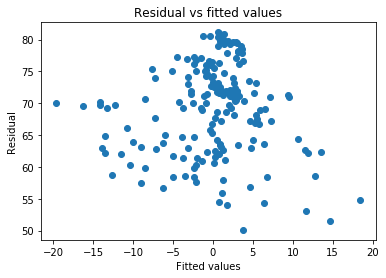

R2: [0.60804762]
R2 ajustado: [0.60369259]
RSE: [5.76713227]
VIF: 1.3892793555795226

ICR y Hepatitis B


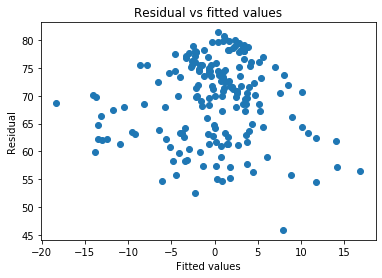

R2: [0.63847966]
R2 ajustado: [0.63446276]
RSE: [5.53872279]
VIF: 1.116476733962885


In [125]:
variablesV2 = ['logGDP', 'Schooling', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'percentage expenditure', 'thinness  1-19 years', 'Alcohol', 'Hepatitis B']
for variable in variablesV2:
    print('')
    print(f'ICR y {variable}')
    run_analysis(xs[['Income composition of resources', variable]], ys.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs[['Income composition of resources', variable]].to_numpy(),1))


## VN


ICR, HIV/AIDS y logGDP


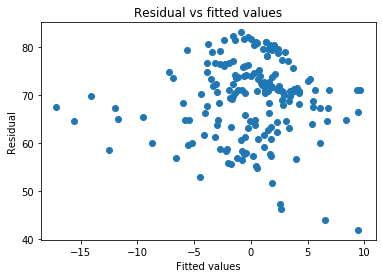

R2: [0.78660125]
R2 ajustado: [0.78302473]
RSE: [4.25538831]
VIF: 2.9580279055138474

ICR, HIV/AIDS y Schooling


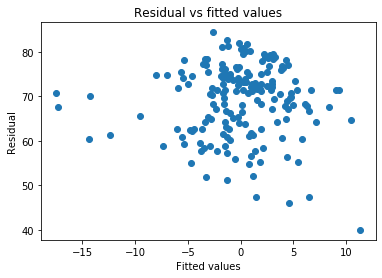

R2: [0.77464396]
R2 ajustado: [0.77086704]
RSE: [4.37298371]
VIF: 3.950557102260738

ICR, HIV/AIDS y BMI


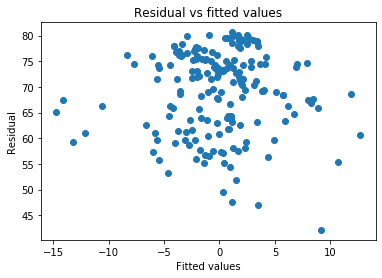

R2: [0.78822035]
R2 ajustado: [0.78467097]
RSE: [4.23921432]
VIF: 1.7385200790759614

ICR, HIV/AIDS y Polio


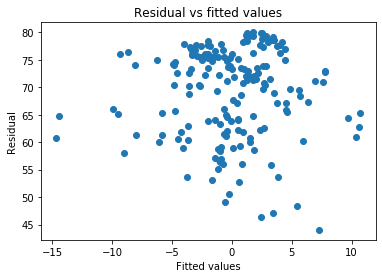

R2: [0.80540432]
R2 ajustado: [0.80214294]
RSE: [4.0635897]
VIF: 1.5057891874938483

ICR, HIV/AIDS y Diphtheria


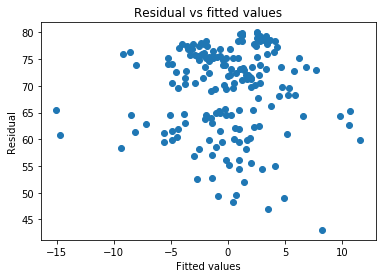

R2: [0.81054641]
R2 ajustado: [0.80737121]
RSE: [4.00954117]
VIF: 1.4482821424217325

ICR, HIV/AIDS y GDP


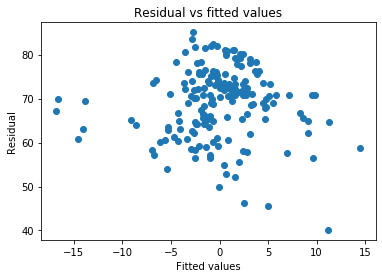

R2: [0.75363013]
R2 ajustado: [0.74950102]
RSE: [4.57232466]
VIF: 1.684804092883867

ICR, HIV/AIDS y percentage expenditure


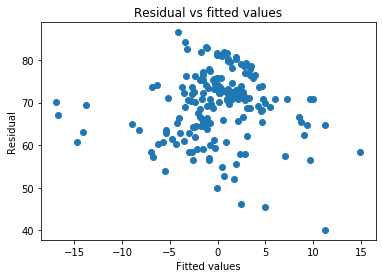

R2: [0.75454843]
R2 ajustado: [0.75043472]
RSE: [4.56379536]
VIF: 1.4863360576755638

ICR, HIV/AIDS y thinness  1-19 years


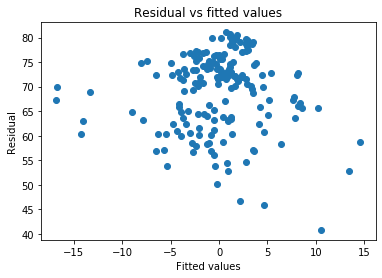

R2: [0.75806865]
R2 ajustado: [0.75401394]
RSE: [4.53095066]
VIF: 1.3232781824999074

ICR, HIV/AIDS y Alcohol


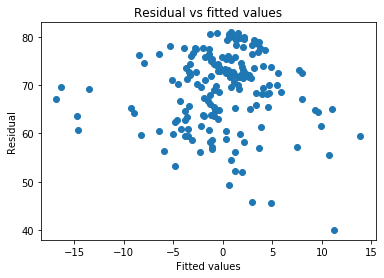

R2: [0.75093919]
R2 ajustado: [0.74676498]
RSE: [4.59722711]
VIF: 1.4000952683666008

ICR, HIV/AIDS y Hepatitis B


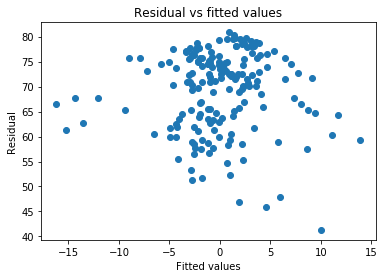

R2: [0.76437998]
R2 ajustado: [0.76043105]
RSE: [4.47145998]
VIF: 1.1278973190688801


In [126]:
variablesV3 = ['logGDP', 'Schooling', 'BMI', 'Polio', 'Diphtheria', 'GDP', 'percentage expenditure', 'thinness  1-19 years', 'Alcohol', 'Hepatitis B']
for variable in variablesV3:
    print('')
    print(f'ICR, HIV/AIDS y {variable}')
    run_analysis(xs[['Income composition of resources', 'HIV/AIDS', variable]], ys.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs[['Income composition of resources', 'HIV/AIDS', variable]].to_numpy(),2))



ICR, HIV/AIDS, Diphtheria y logGDP


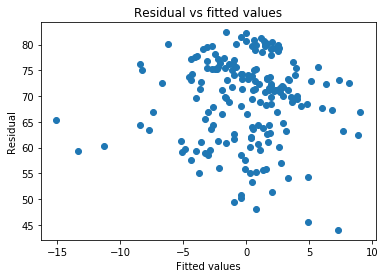

R2: [0.83894619]
R2 ajustado: [0.835327]
RSE: [3.69682389]
VIF: 3.0416794309556345

ICR, HIV/AIDS, Diphtheria y Schooling


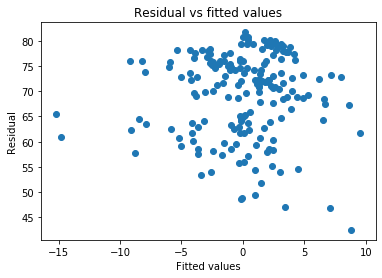

R2: [0.82542553]
R2 ajustado: [0.82150251]
RSE: [3.8488734]
VIF: 4.1707679523429

ICR, HIV/AIDS, Diphtheria y BMI


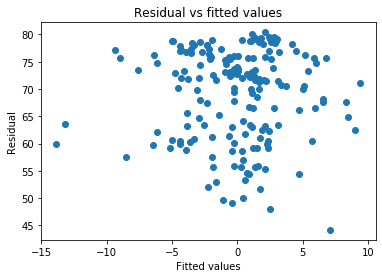

R2: [0.83825814]
R2 ajustado: [0.83462349]
RSE: [3.70471224]
VIF: 1.804550718782329

ICR, HIV/AIDS, Diphtheria y Polio


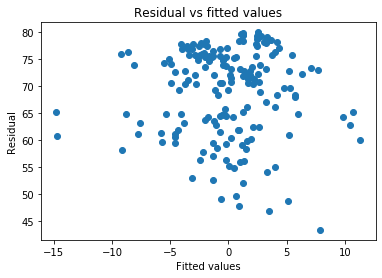

R2: [0.81129054]
R2 ajustado: [0.80704988]
RSE: [4.00165917]
VIF: 9.842952959311939

ICR, HIV/AIDS, Diphtheria y GDP


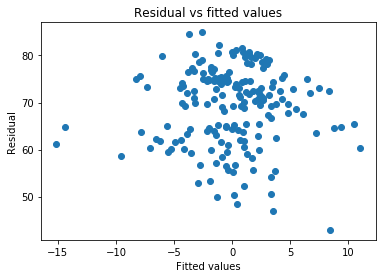

R2: [0.82219021]
R2 ajustado: [0.81819449]
RSE: [3.88437446]
VIF: 1.6851400246138317

ICR, HIV/AIDS, Diphtheria y percentage expenditure


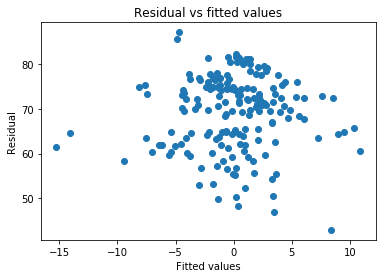

R2: [0.82592983]
R2 ajustado: [0.82201814]
RSE: [3.84331019]
VIF: 1.491473776028689

ICR, HIV/AIDS, Diphtheria y thinness  1-19 years


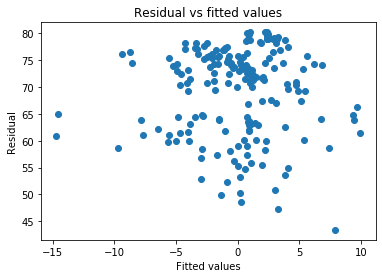

R2: [0.82097809]
R2 ajustado: [0.81695513]
RSE: [3.89759175]
VIF: 1.3327273630010115

ICR, HIV/AIDS, Diphtheria y Alcohol


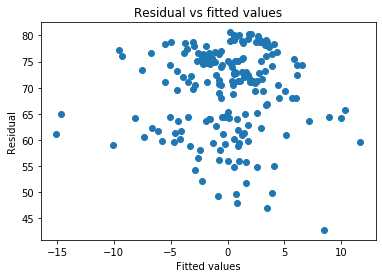

R2: [0.81544176]
R2 ajustado: [0.81129439]
RSE: [3.95740024]
VIF: 1.4089564903806295

ICR, HIV/AIDS, Diphtheria y Hepatitis B


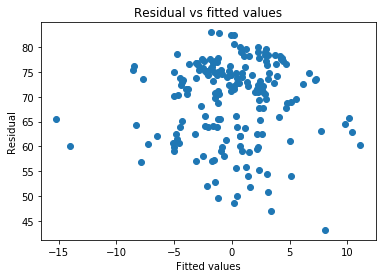

R2: [0.81772463]
R2 ajustado: [0.81362856]
RSE: [3.9328488]
VIF: 2.788122247799637


In [127]:
variablesV4 = ['logGDP', 'Schooling', 'BMI', 'Polio', 'GDP', 'percentage expenditure', 'thinness  1-19 years', 'Alcohol', 'Hepatitis B']
for variable in variablesV4:
    print('')
    print(f'ICR, HIV/AIDS, Diphtheria y {variable}')
    run_analysis(xs[['Income composition of resources', 'HIV/AIDS', 'Diphtheria', variable]], ys.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs[['Income composition of resources', 'HIV/AIDS', 'Diphtheria', variable]].to_numpy(),3))


In [128]:
correlaciones

Life expectancy                    1.000000
Adult Mortality                    0.896441
Income composition of resources    0.777659
logGDP                             0.762051
Schooling                          0.756699
BMI                                0.712117
Polio                              0.679231
Diphtheria                         0.672322
HIV/AIDS                           0.587153
GDP                                0.572807
percentage expenditure             0.524320
thinness  1-19 years               0.514356
thinness 5-9 years                 0.507002
Alcohol                            0.460338
Hepatitis B                        0.424982
Total expenditure                  0.288134
under-five deaths                  0.225785
Measles                            0.201076
infant deaths                      0.199914
Population                         0.048532
Name: Life expectancy, dtype: float64


ICR, HIV/AIDS, Diphtheria, BMI y logGDP


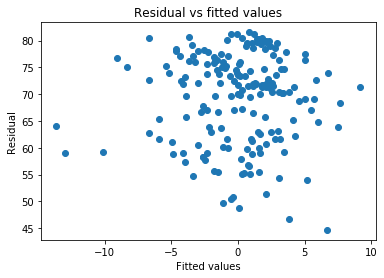

R2: [0.85334258]
R2 ajustado: [0.84919972]
RSE: [3.52772949]
VIF: 3.3677888417894186

ICR, HIV/AIDS, Diphtheria, BMI y Schooling


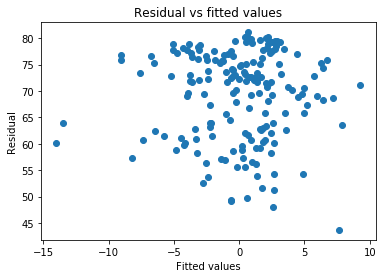

R2: [0.84492716]
R2 ajustado: [0.84054657]
RSE: [3.62753094]
VIF: 4.4704442807741565

ICR, HIV/AIDS, Diphtheria, BMI y Polio


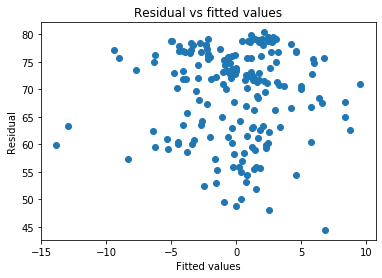

R2: [0.83873298]
R2 ajustado: [0.83417741]
RSE: [3.69927012]
VIF: 9.853708335693925

ICR, HIV/AIDS, Diphtheria, BMI y GDP


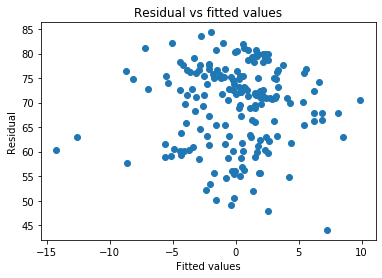

R2: [0.8484386]
R2 ajustado: [0.8441572]
RSE: [3.58622525]
VIF: 1.6882110067302587

ICR, HIV/AIDS, Diphtheria, BMI y percentage expenditure


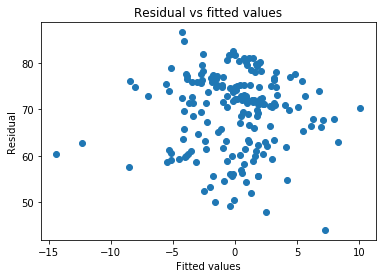

R2: [0.8528907]
R2 ajustado: [0.84873507]
RSE: [3.53316018]
VIF: 1.491986365304516

ICR, HIV/AIDS, Diphtheria, BMI y thinness  1-19 years


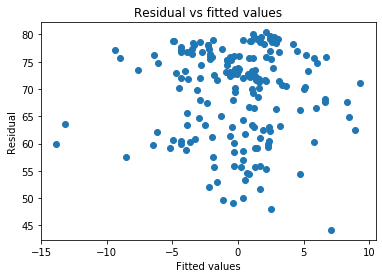

R2: [0.83827259]
R2 ajustado: [0.83370402]
RSE: [3.70454672]
VIF: 2.0638547466568324

ICR, HIV/AIDS, Diphtheria, BMI y Alcohol


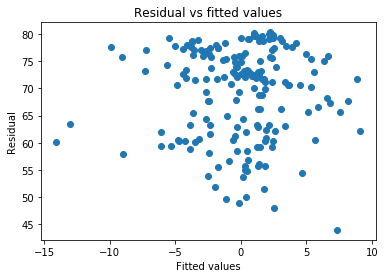

R2: [0.8398783]
R2 ajustado: [0.83535509]
RSE: [3.68611056]
VIF: 1.4575386488631419

ICR, HIV/AIDS, Diphtheria, BMI y Hepatitis B


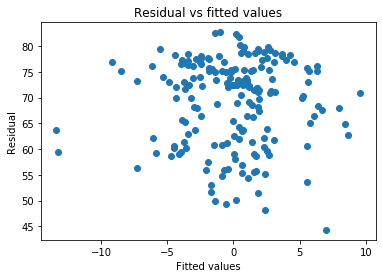

R2: [0.84336537]
R2 ajustado: [0.83894067]
RSE: [3.64575221]
VIF: 2.806565391324944

ICR, HIV/AIDS, Diphtheria, BMI y Total expenditure


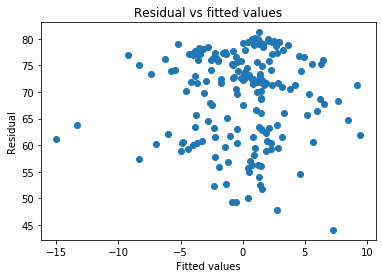

R2: [0.84076749]
R2 ajustado: [0.83626939]
RSE: [3.67586145]
VIF: 1.2276432835230577

ICR, HIV/AIDS, Diphtheria, BMI y under-five deaths


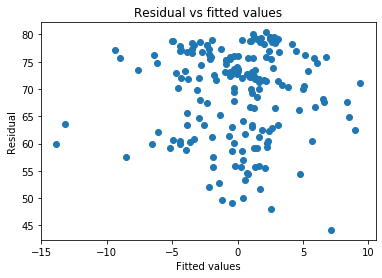

R2: [0.8382856]
R2 ajustado: [0.8337174]
RSE: [3.70439766]
VIF: 1.1364314827669972

ICR, HIV/AIDS, Diphtheria, BMI y Measles


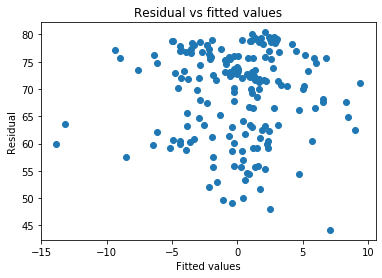

R2: [0.83825861]
R2 ajustado: [0.83368964]
RSE: [3.70470685]
VIF: 1.1601207960213364

ICR, HIV/AIDS, Diphtheria, BMI y infant deaths


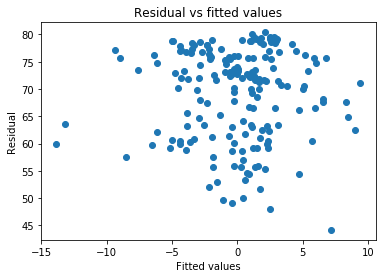

R2: [0.83825965]
R2 ajustado: [0.83369071]
RSE: [3.7046949]
VIF: 1.1212205509133437


In [129]:
variablesV5 = ['logGDP', 'Schooling', 'Polio', 'GDP', 'percentage expenditure', 'thinness  1-19 years', 'Alcohol', 'Hepatitis B', 'Total expenditure', 'under-five deaths', 'Measles', 'infant deaths']
for variable in variablesV5:
    print('')
    print(f'ICR, HIV/AIDS, Diphtheria, BMI y {variable}')
    run_analysis(xs[['Income composition of resources', 'HIV/AIDS', 'Diphtheria', 'BMI', variable]], ys.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs[['Income composition of resources', 'HIV/AIDS', 'Diphtheria', 'BMI', variable]].to_numpy(),4))
    

## Final? 

### ICR, HIV/AIDS, Diphtheria, BMI y percentage expenditure.

Quizas sin percentage expenditure.

# Developing vs Developed

## Developing

In [130]:
df_developing = df_orig[df_orig['Status'] == 'Developing']
developing_cols = df_developing.columns.to_list()
developing_cols.remove('Life expectancy')
developing_cols.remove('Status')
developing_cols.remove('Country')
for columna in developing_cols:
    df_developing[columna] = (df_developing[columna]-np.mean(df_developing[columna]))/np.std(df_developing[columna])

/home/gonzamonas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


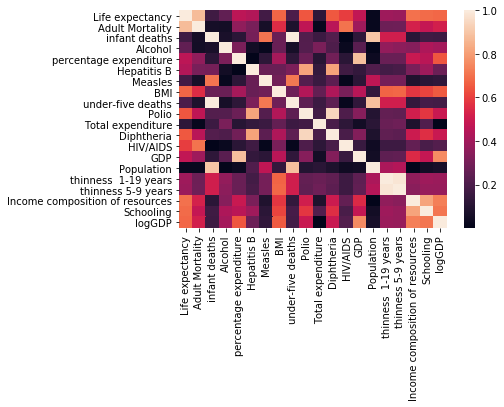

In [131]:
sns.heatmap(abs(df_developing.corr()))
plt.savefig("heatmap_corr_developing.png", bbox_inches='tight')

In [132]:
correlaciones_developing = abs(df_developing.corr()['Life expectancy'])
correlaciones_developing = correlaciones_developing.sort_values(ascending=False)
correlaciones_developing

Life expectancy                    1.000000
Adult Mortality                    0.875761
Income composition of resources    0.703101
Schooling                          0.691317
logGDP                             0.682082
BMI                                0.679835
Diphtheria                         0.650166
Polio                              0.646052
HIV/AIDS                           0.596540
GDP                                0.475193
percentage expenditure             0.462681
Hepatitis B                        0.438789
thinness  1-19 years               0.393524
thinness 5-9 years                 0.384340
Alcohol                            0.251398
under-five deaths                  0.196396
Measles                            0.174120
infant deaths                      0.167719
Total expenditure                  0.122473
Population                         0.024380
Name: Life expectancy, dtype: float64

In [133]:
ys_developing = df_developing['Life expectancy']

In [134]:
xs_developing = df_developing.drop('Life expectancy', axis=1)

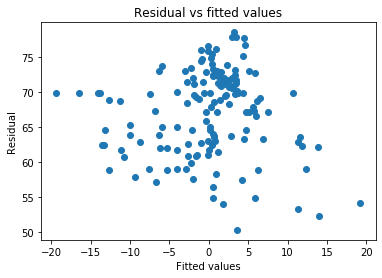

R2: [0.49435129]
R2 ajustado: [0.49095768]
RSE: [6.15956382]


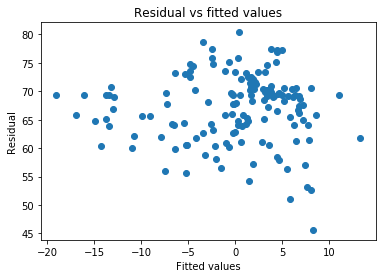

R2: [0.47791982]
R2 ajustado: [0.47441593]
RSE: [6.25884378]


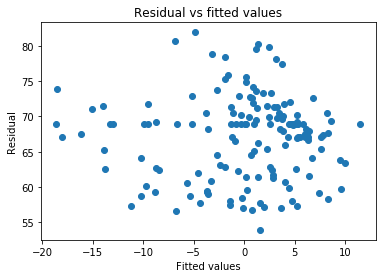

R2: [0.46523617]
R2 ajustado: [0.46164715]
RSE: [6.33441513]


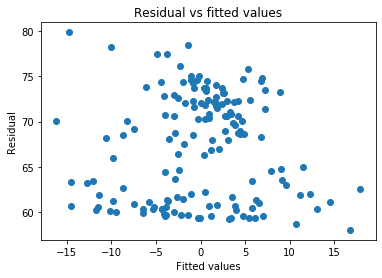

R2: [0.46217608]
R2 ajustado: [0.45856652]
RSE: [6.35251307]


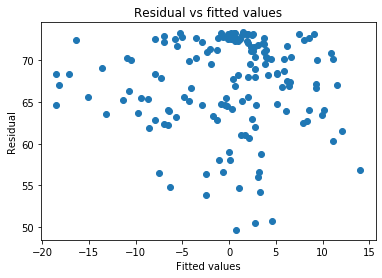

R2: [0.42271625]
R2 ajustado: [0.41884186]
RSE: [6.58142864]


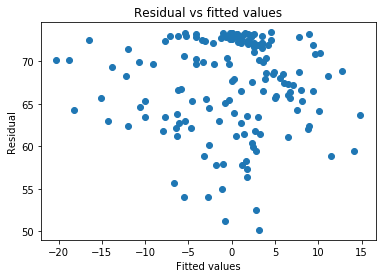

R2: [0.41738371]
R2 ajustado: [0.41347353]
RSE: [6.61175605]


array([ 5.55901589, 67.11146523])

In [135]:
run_analysis(xs_developing[[
'Income composition of resources']], ys_developing.values.reshape(-1, 1))
run_analysis(xs_developing[[
'Schooling']], ys_developing.values.reshape(-1, 1))
run_analysis(xs_developing[[
'logGDP']], ys_developing.values.reshape(-1, 1))
run_analysis(xs_developing[[
'BMI']], ys_developing.values.reshape(-1, 1))
run_analysis(xs_developing[[
'Diphtheria']], ys_developing.values.reshape(-1, 1))
run_analysis(xs_developing[[
'Polio']], ys_developing.values.reshape(-1, 1))


## V2


ICR y Schooling


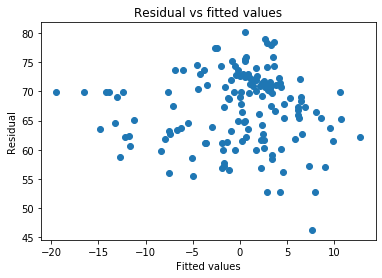

R2: [0.53510995]
R2 ajustado: [0.52882765]
RSE: [5.9060978]
VIF: 3.024119900228316

ICR y logGDP


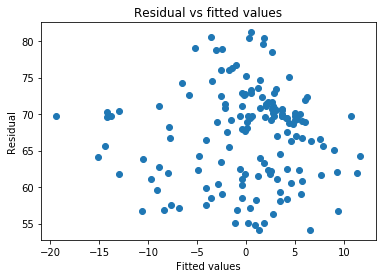

R2: [0.55431787]
R2 ajustado: [0.54829514]
RSE: [5.7827993]
VIF: 2.1632707487081184

ICR y BMI


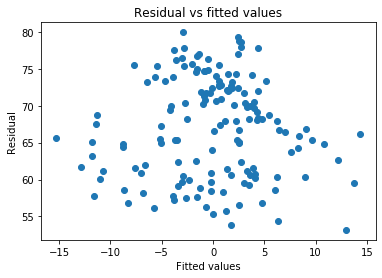

R2: [0.60622856]
R2 ajustado: [0.60090732]
RSE: [5.4356016]
VIF: 1.5044650248008475

ICR y Polio


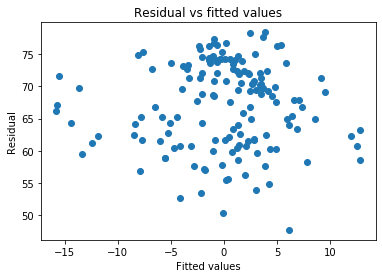

R2: [0.60435226]
R2 ajustado: [0.59900567]
RSE: [5.44853635]
VIF: 1.3596616632967489

ICR y HIV/AIDS


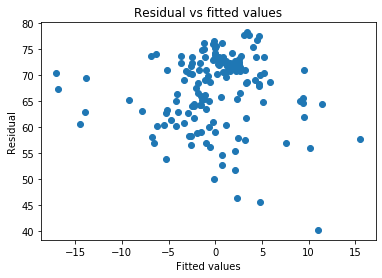

R2: [0.68063705]
R2 ajustado: [0.67632133]
RSE: [4.89516996]
VIF: 1.0694578966902697

ICR y GDP


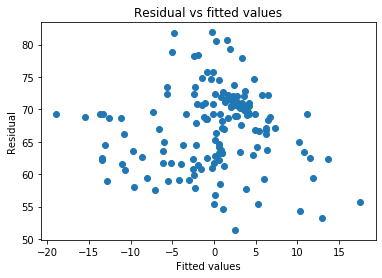

R2: [0.50582302]
R2 ajustado: [0.49914495]
RSE: [6.08929151]
VIF: 1.430258816467295

ICR y percentage expenditure


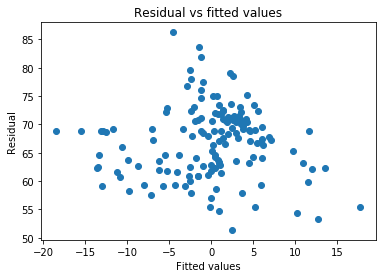

R2: [0.51150847]
R2 ajustado: [0.50490723]
RSE: [6.05416187]
VIF: 1.326858528720797


In [136]:
variablesV2 = ['Schooling', 'logGDP', 'BMI', 'Polio', 'HIV/AIDS', 'GDP', 'percentage expenditure']
for variable in variablesV2:
    print('')
    print(f'ICR y {variable}')
    run_analysis(xs_developing[['Income composition of resources', variable]], ys_developing.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs_developing[['Income composition of resources', variable]].to_numpy(),1))



## VN


ICR, HIV/AIDS y Schooling


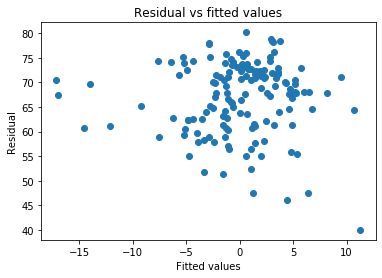

R2: [0.72603127]
R2 ajustado: [0.72044007]
RSE: [4.53394251]
VIF: 3.0261217363569908

ICR, HIV/AIDS y logGDP


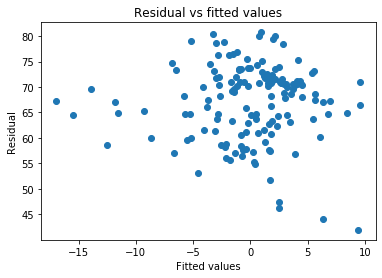

R2: [0.73120748]
R2 ajustado: [0.72572192]
RSE: [4.49090736]
VIF: 2.1680430082129627

ICR, HIV/AIDS y BMI


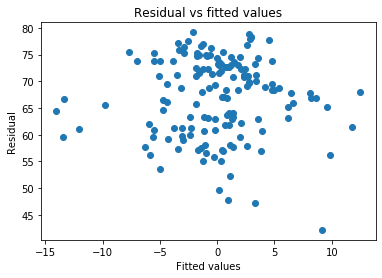

R2: [0.74390454]
R2 ajustado: [0.7386781]
RSE: [4.38355488]
VIF: 1.5701318620537663

ICR, HIV/AIDS y Polio


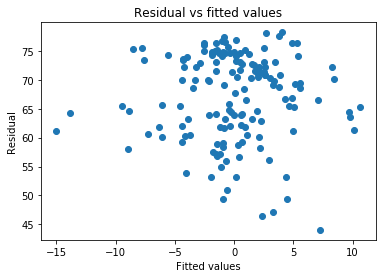

R2: [0.7673422]
R2 ajustado: [0.76259408]
RSE: [4.1781528]
VIF: 1.370494451746201

ICR, HIV/AIDS y Diphtheria


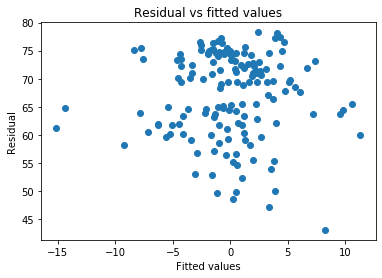

R2: [0.77622027]
R2 ajustado: [0.77165334]
RSE: [4.09765963]
VIF: 1.3481198266819967

ICR, HIV/AIDS y GDP


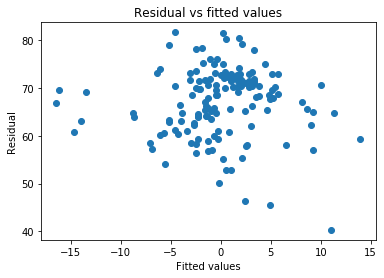

R2: [0.69085266]
R2 ajustado: [0.68454353]
RSE: [4.81624162]
VIF: 1.4305393164946565

ICR, HIV/AIDS y percentage expenditure


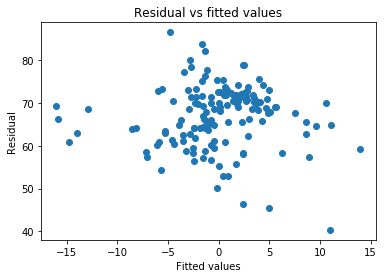

R2: [0.6998106]
R2 ajustado: [0.69368429]
RSE: [4.74595026]
VIF: 1.3272553031025223

ICR, HIV/AIDS y Hepatitis B


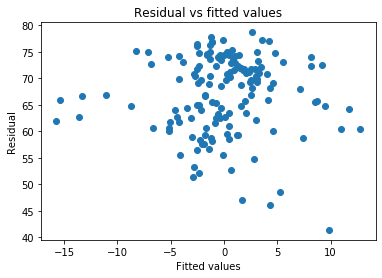

R2: [0.71642295]
R2 ajustado: [0.71063567]
RSE: [4.61276198]
VIF: 1.119270395469411

ICR, HIV/AIDS y thinness  1-19 years


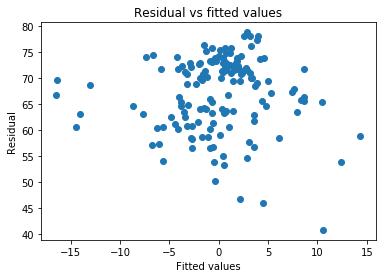

R2: [0.69425647]
R2 ajustado: [0.6880168]
RSE: [4.78965408]
VIF: 1.1565572601174183


In [137]:
variablesV3 = ['Schooling', 'logGDP', 'BMI', 'Polio', 'Diphtheria', 'GDP', 'percentage expenditure', 'Hepatitis B', 'thinness  1-19 years']
for variable in variablesV3:
    print('')
    print(f'ICR, HIV/AIDS y {variable}')
    run_analysis(xs_developing[['Income composition of resources', 'HIV/AIDS', variable]], ys_developing.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs_developing[['Income composition of resources', 'HIV/AIDS', variable]].to_numpy(),2))



ICR, HIV/AIDS, Diphtheria y Schooling


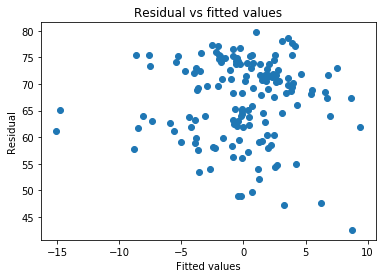

R2: [0.79193717]
R2 ajustado: [0.78623681]
RSE: [3.95114314]
VIF: 3.331277328513156

ICR, HIV/AIDS, Diphtheria y logGDP


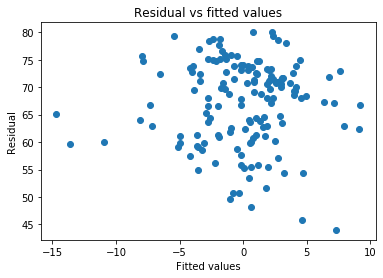

R2: [0.80301968]
R2 ajustado: [0.79762296]
RSE: [3.84447397]
VIF: 2.267698184917437

ICR, HIV/AIDS, Diphtheria y BMI


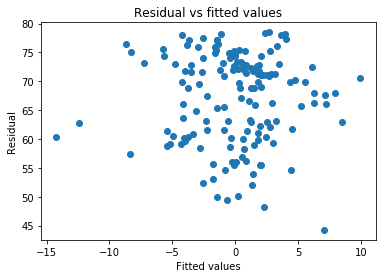

R2: [0.81519655]
R2 ajustado: [0.81013344]
RSE: [3.72375024]
VIF: 1.6265061009609254

ICR, HIV/AIDS, Diphtheria y Polio


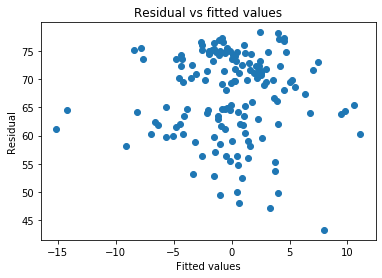

R2: [0.77669807]
R2 ajustado: [0.77058021]
RSE: [4.0932828]
VIF: 9.576040852385207

ICR, HIV/AIDS, Diphtheria y GDP


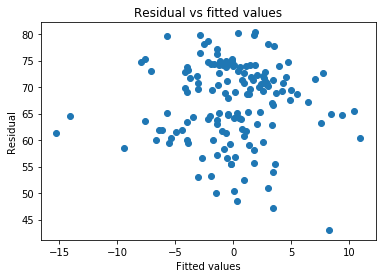

R2: [0.78241186]
R2 ajustado: [0.77645054]
RSE: [4.04057453]
VIF: 1.438221972717332

ICR, HIV/AIDS, Diphtheria y percentage expenditure


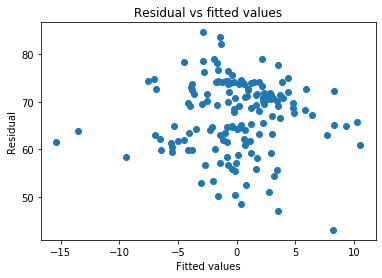

R2: [0.79087636]
R2 ajustado: [0.78514694]
RSE: [3.9612028]
VIF: 1.3315718837913328

ICR, HIV/AIDS, Diphtheria y Hepatitis B


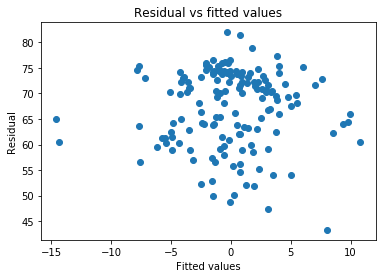

R2: [0.78579148]
R2 ajustado: [0.77992276]
RSE: [4.0090722]
VIF: 3.1261180006634275

ICR, HIV/AIDS, Diphtheria y thinness  1-19 years


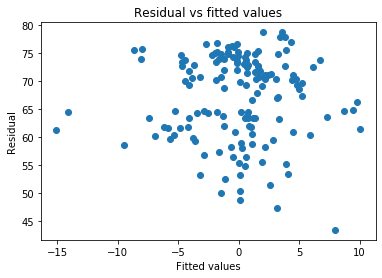

R2: [0.7847958]
R2 ajustado: [0.77889979]
RSE: [4.01837889]
VIF: 1.163798294045856


In [138]:
variablesV4 = ['Schooling', 'logGDP', 'BMI', 'Polio', 'GDP', 'percentage expenditure', 'Hepatitis B', 'thinness  1-19 years']
for variable in variablesV4:
    print('')
    print(f'ICR, HIV/AIDS, Diphtheria y {variable}')
    run_analysis(xs_developing[['Income composition of resources', 'HIV/AIDS', 'Diphtheria', variable]], ys_developing.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs_developing[['Income composition of resources', 'HIV/AIDS', 'Diphtheria', variable]].to_numpy(),3))


In [139]:
correlaciones_developing

Life expectancy                    1.000000
Adult Mortality                    0.875761
Income composition of resources    0.703101
Schooling                          0.691317
logGDP                             0.682082
BMI                                0.679835
Diphtheria                         0.650166
Polio                              0.646052
HIV/AIDS                           0.596540
GDP                                0.475193
percentage expenditure             0.462681
Hepatitis B                        0.438789
thinness  1-19 years               0.393524
thinness 5-9 years                 0.384340
Alcohol                            0.251398
under-five deaths                  0.196396
Measles                            0.174120
infant deaths                      0.167719
Total expenditure                  0.122473
Population                         0.024380
Name: Life expectancy, dtype: float64


ICR, HIV/AIDS, Diphtheria, BMI y Schooling


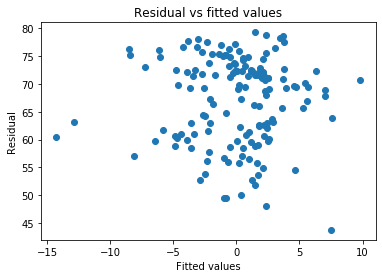

R2: [0.82095601]
R2 ajustado: [0.81478208]
RSE: [3.66526506]
VIF: 3.58140550801739

ICR, HIV/AIDS, Diphtheria, BMI y logGDP


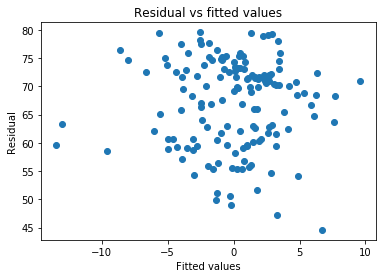

R2: [0.82405821]
R2 ajustado: [0.81799125]
RSE: [3.6333732]
VIF: 2.6749199450817214

ICR, HIV/AIDS, Diphtheria, BMI y Polio


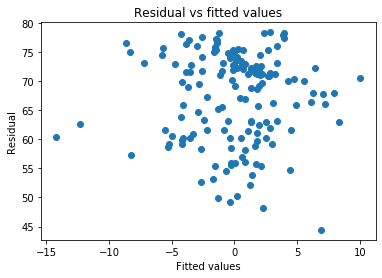

R2: [0.81538926]
R2 ajustado: [0.80902338]
RSE: [3.72180817]
VIF: 9.591742774000817

ICR, HIV/AIDS, Diphtheria, BMI y GDP


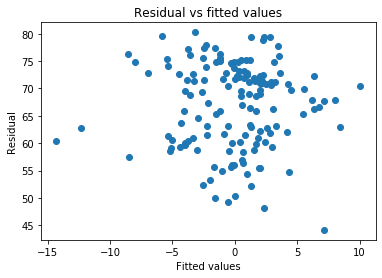

R2: [0.81689549]
R2 ajustado: [0.81058154]
RSE: [3.70659412]
VIF: 1.4943128150866114

ICR, HIV/AIDS, Diphtheria, BMI y percentage expenditure


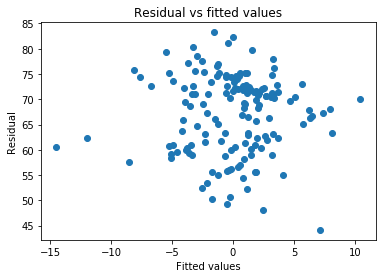

R2: [0.82290557]
R2 ajustado: [0.81679887]
RSE: [3.64525537]
VIF: 1.373822544541386

ICR, HIV/AIDS, Diphtheria, BMI y Hepatitis B


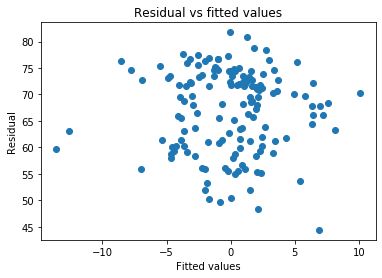

R2: [0.8216267]
R2 ajustado: [0.8154759]
RSE: [3.65839358]
VIF: 3.152256394901293

ICR, HIV/AIDS, Diphtheria, BMI y thinness  1-19 years


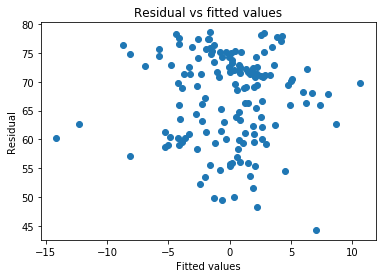

R2: [0.81644478]
R2 ajustado: [0.81011529]
RSE: [3.71115321]
VIF: 1.8562264963832336

ICR, HIV/AIDS, Diphtheria, BMI y thinness 5-9 years


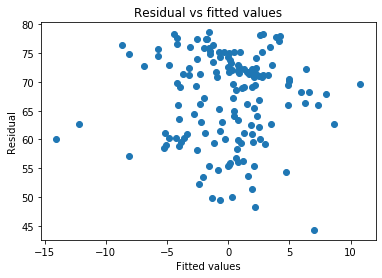

R2: [0.81677401]
R2 ajustado: [0.81045587]
RSE: [3.70782348]
VIF: 1.8868707262380828

ICR, HIV/AIDS, Diphtheria, BMI y Alcohol


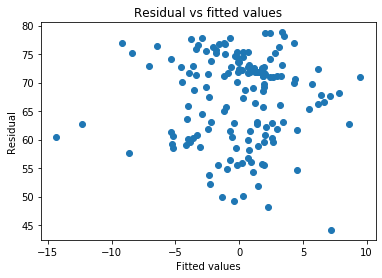

R2: [0.81599425]
R2 ajustado: [0.80964922]
RSE: [3.71570484]
VIF: 1.1688421879170408

ICR, HIV/AIDS, Diphtheria, BMI y Measles


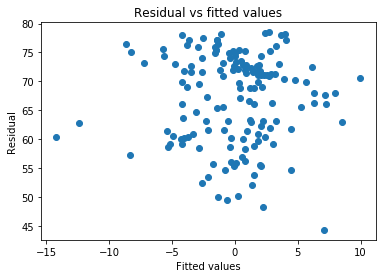

R2: [0.81525005]
R2 ajustado: [0.80887936]
RSE: [3.72321124]
VIF: 1.152930094278502


In [140]:
variablesV5 = ['Schooling', 'logGDP', 'Polio', 'GDP', 'percentage expenditure', 'Hepatitis B', 'thinness  1-19 years', 'thinness 5-9 years', 'Alcohol', 'Measles']
for variable in variablesV5:
    print('')
    print(f'ICR, HIV/AIDS, Diphtheria, BMI y {variable}')
    run_analysis(xs_developing[['Income composition of resources', 'HIV/AIDS', 'Diphtheria', 'BMI', variable]], ys_developing.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs_developing[['Income composition of resources', 'HIV/AIDS', 'Diphtheria', 'BMI', variable]].to_numpy(),4))

## Final?

### ICR, HIV/AIDS, Diphtheria, BMI 

quizas con percentage expenditure


## Developed

In [141]:
df_developed = df_orig[df_orig['Status'] == 'Developed']
developed_cols = df_developed.columns.to_list()
developed_cols.remove('Life expectancy')
developed_cols.remove('Status')
developed_cols.remove('Country')
for columna in developed_cols:
    df_developed[columna] = (df_developed[columna]-np.mean(df_developed[columna]))/np.std(df_developed[columna])

/home/gonzamonas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [142]:
df_developed

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,logGDP
7,Australia,81.81250,-0.536511,-0.108404,0.130483,1.080544,0.741569,-0.314076,0.522596,-0.081399,...,-1.162824,-1.0,1.042731,-0.189507,-0.877963,-0.825096,1.152080,2.443816,Developed,1.015925
8,Austria,81.48125,-0.453179,-0.327782,1.018714,0.914560,-0.384454,-0.335293,-0.452782,-0.338370,...,-1.184842,-1.0,0.986318,0.025976,0.552870,0.787188,0.386904,-0.069461,Developed,0.989062
15,Belgium,80.68125,-0.308873,-0.272938,0.509283,-0.127911,-0.983402,-0.331864,-0.117194,-0.151482,...,0.675676,-1.0,-0.191412,-0.383886,-0.617047,-0.541027,0.597928,0.687224,Developed,0.202367
24,Bulgaria,72.85000,1.489871,-0.122115,0.433580,-0.967184,0.841964,0.819881,0.347157,-0.151482,...,0.092200,-1.0,-1.025419,-0.109162,1.091536,1.055902,-1.091979,-0.968025,Developed,-1.195023
39,Croatia,76.11875,0.302903,-0.327782,1.109216,-0.633351,0.999148,-0.377874,0.071121,-0.338370,...,0.334398,-1.0,-0.738663,-0.580696,0.569703,0.518474,-0.619320,-0.880196,Developed,-0.506742
41,Cyprus,79.67500,-0.831221,-0.327782,0.175450,-0.727974,0.670836,-0.395166,0.174936,-0.338370,...,0.796775,-1.0,-0.401469,-0.668527,-0.558130,-0.364443,-0.015414,-1.079501,Developed,-0.020580
42,Czechia,76.76875,-0.256029,-0.327782,1.355962,-1.111364,1.096211,-0.378471,0.503281,-0.338370,...,0.818793,-1.0,-1.164758,-0.288235,0.906369,0.940739,-2.428463,-1.721333,Developed,-1.784604
46,Denmark,79.25625,-0.443017,-0.327782,0.366415,1.072779,-0.251939,-0.384185,0.517767,-0.338370,...,-0.964662,-1.0,0.933389,-0.226823,-0.213047,-0.441219,0.901596,0.906798,Developed,0.963266
62,Germany,81.17500,-0.274321,0.220664,0.759445,0.492168,-0.715301,0.793547,0.024445,0.269017,...,-0.634393,-1.0,0.325472,3.710729,-0.271963,-0.233925,0.827823,0.585882,Developed,0.615332
72,Hungary,73.82500,2.191076,-0.204382,0.673496,-0.956460,-0.251939,-0.395066,0.660211,-0.174843,...,0.972919,-1.0,-0.776487,-0.529888,0.805369,0.756478,-0.410011,-0.214718,Developed,-0.576943


AttributeError: 'DataFrame' object has no attribute 'developed'

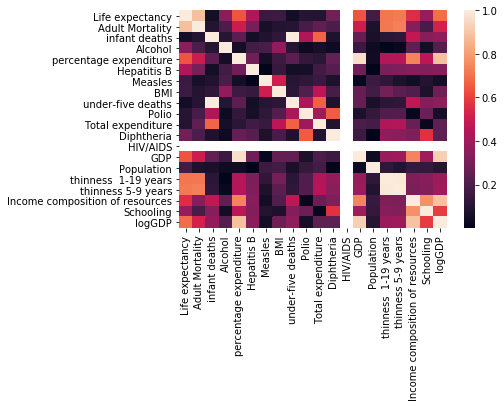

In [144]:
sns.heatmap(abs(df_developed.corr()))
plt.savefig("heatmap_corr_developed.png", bbox_inches='tight')

In [145]:
correlaciones_developed = abs(df_developed.corr()['Life expectancy'])
correlaciones_developed = correlaciones_developed.sort_values(ascending=False)
correlaciones_developed

Life expectancy                    1.000000
Adult Mortality                    0.883067
thinness 5-9 years                 0.721003
thinness  1-19 years               0.713838
logGDP                             0.693826
percentage expenditure             0.643915
GDP                                0.643602
Income composition of resources    0.558930
Hepatitis B                        0.432332
Schooling                          0.379213
Alcohol                            0.345349
Diphtheria                         0.292043
Population                         0.179084
BMI                                0.164733
Measles                            0.155579
Polio                              0.102560
Total expenditure                  0.098335
infant deaths                      0.054296
under-five deaths                  0.049539
HIV/AIDS                                NaN
Name: Life expectancy, dtype: float64

In [146]:
ys_developed = df_developed['Life expectancy']

In [147]:
xs_developed = df_developed.drop('Life expectancy', axis=1)

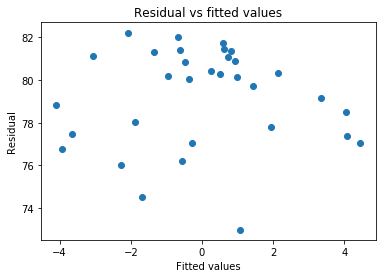

R2: [0.51984568]
R2 ajustado: [0.50384054]
RSE: [2.27024552]


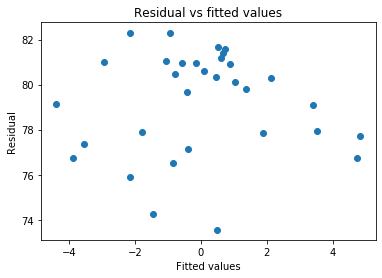

R2: [0.50956398]
R2 ajustado: [0.49321611]
RSE: [2.29442352]


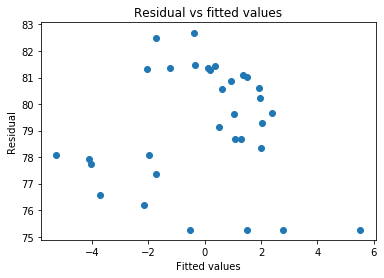

R2: [0.48139503]
R2 ajustado: [0.4641082]
RSE: [2.35939549]


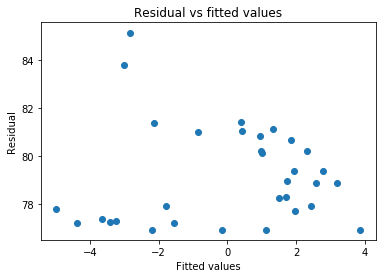

R2: [0.41462618]
R2 ajustado: [0.39511372]
RSE: [2.50668092]


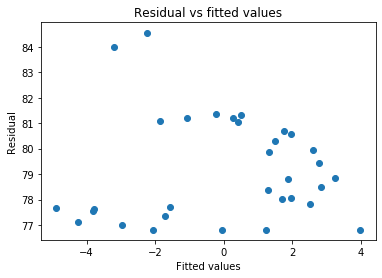

R2: [0.41422359]
R2 ajustado: [0.3946977]
RSE: [2.50754277]


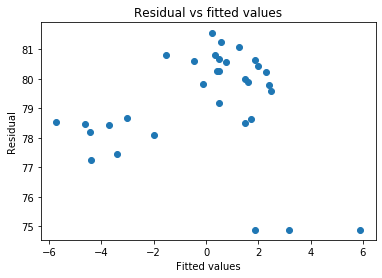

R2: [0.31240219]
R2 ajustado: [0.28948227]
RSE: [2.71674983]


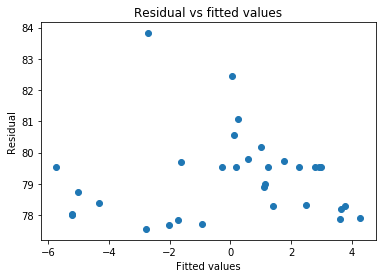

R2: [0.18691073]
R2 ajustado: [0.15980776]
RSE: [2.9542791]


In [148]:
variablesV1 = ['thinness 5-9 years', 'thinness  1-19 years', 'logGDP', 'percentage expenditure', 'GDP', 'Income composition of resources', 'Hepatitis B']
for variable in variablesV1:
    run_analysis(xs_developed[[variable]], ys_developed.values.reshape(-1, 1))


## V2


thinness 5-9 y logGDP


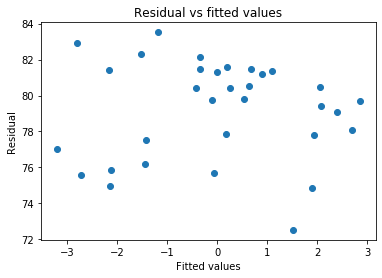

R2: [0.71880595]
R2 ajustado: [0.69941325]
RSE: [1.73734262]
VIF: 1.1833091879040005

thinness 5-9 y percentage expenditure


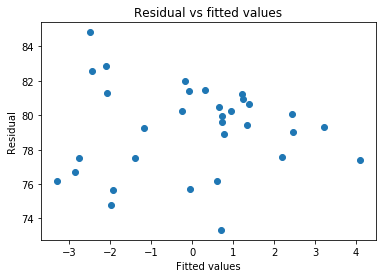

R2: [0.64831594]
R2 ajustado: [0.62406186]
RSE: [1.94293715]
VIF: 1.2522929493356285

thinness 5-9 y GDP


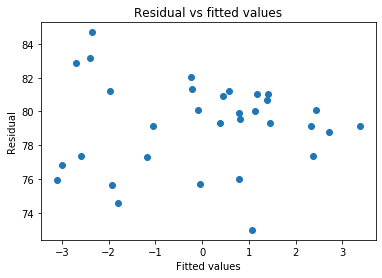

R2: [0.67194963]
R2 ajustado: [0.64932546]
RSE: [1.87651775]
VIF: 1.1859050313700894

thinness 5-9 y Income composition of resources


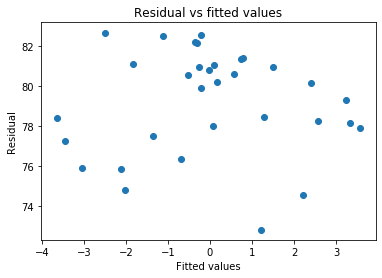

R2: [0.64134686]
R2 ajustado: [0.61661216]
RSE: [1.96209362]
VIF: 1.1114284433238197

thinness 5-9 y Hepatitis B


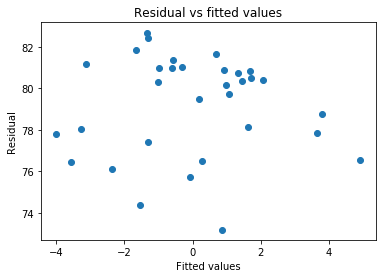

R2: [0.56411741]
R2 ajustado: [0.53405654]
RSE: [2.16305304]
VIF: 1.1168754731209785

thinness 5-9 y Schooling


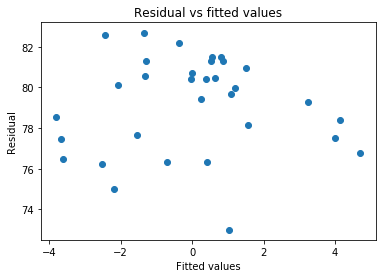

R2: [0.54188284]
R2 ajustado: [0.51028856]
RSE: [2.21753604]
VIF: 1.1236414224121425

thinness 5-9 y Alcohol


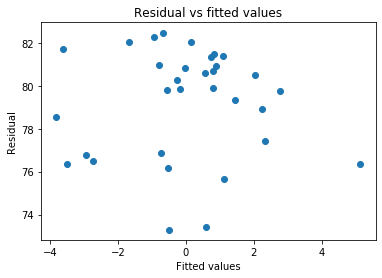

R2: [0.62866283]
R2 ajustado: [0.60305337]
RSE: [1.99648762]
VIF: 1.0004654537260247

thinness 5-9 y Diphtheria


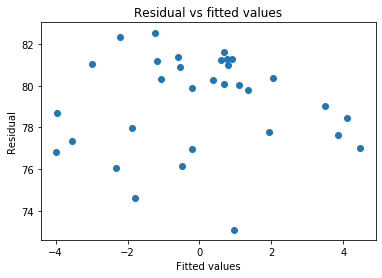

R2: [0.52198265]
R2 ajustado: [0.48901594]
RSE: [2.26518792]
VIF: 1.1349901010445977

thinness 5-9 y Measles


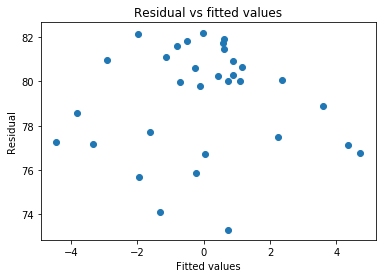

R2: [0.56538314]
R2 ajustado: [0.53540957]
RSE: [2.15991018]
VIF: 1.0063214906956766


In [149]:
variablesV2 = ['logGDP', 'percentage expenditure', 'GDP', 'Income composition of resources', 'Hepatitis B', 'Schooling', 'Alcohol', 'Diphtheria', 'Measles']
for variable in variablesV2:
    print('')
    print(f'thinness 5-9 y {variable}')
    run_analysis(xs_developed[['thinness 5-9 years', variable]], ys_developed.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs_developed[['thinness 5-9 years', variable]].to_numpy(),1))



## VN

In [150]:
correlaciones_developed

Life expectancy                    1.000000
Adult Mortality                    0.883067
thinness 5-9 years                 0.721003
thinness  1-19 years               0.713838
logGDP                             0.693826
percentage expenditure             0.643915
GDP                                0.643602
Income composition of resources    0.558930
Hepatitis B                        0.432332
Schooling                          0.379213
Alcohol                            0.345349
Diphtheria                         0.292043
Population                         0.179084
BMI                                0.164733
Measles                            0.155579
Polio                              0.102560
Total expenditure                  0.098335
infant deaths                      0.054296
under-five deaths                  0.049539
HIV/AIDS                                NaN
Name: Life expectancy, dtype: float64


thinness, logGDP y percentage expenditure


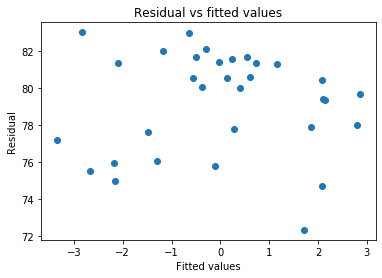

R2: [0.72155255]
R2 ajustado: [0.69171889]
RSE: [1.72883693]
VIF: 4.904242062210603

thinness, logGDP y GDP


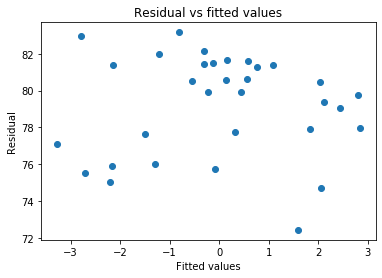

R2: [0.72024485]
R2 ajustado: [0.69027109]
RSE: [1.73289181]
VIF: 6.875047292550737

thinness, logGDP y Income composition of resources


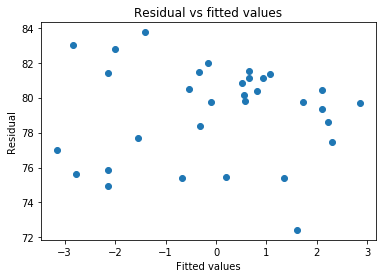

R2: [0.72729397]
R2 ajustado: [0.69807547]
RSE: [1.7109203]
VIF: 4.9144888394006605

thinness, logGDP y Hepatitis B


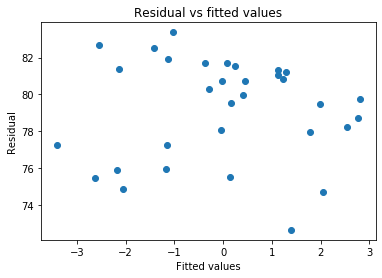

R2: [0.72930534]
R2 ajustado: [0.70030234]
RSE: [1.70459909]
VIF: 1.190855168110305

thinness, logGDP y Schooling


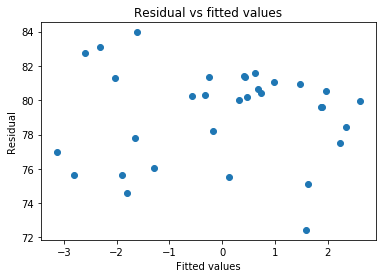

R2: [0.72969099]
R2 ajustado: [0.70072931]
RSE: [1.70338442]
VIF: 1.5648947840114835

thinness, logGDP y Alcohol


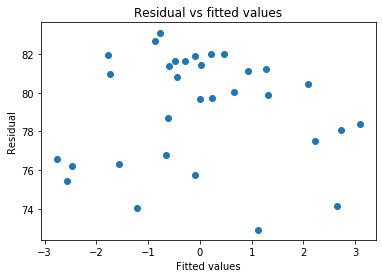

R2: [0.77297426]
R2 ajustado: [0.74865007]
RSE: [1.56106131]
VIF: 1.0573780269799327

thinness, logGDP y Diphtheria


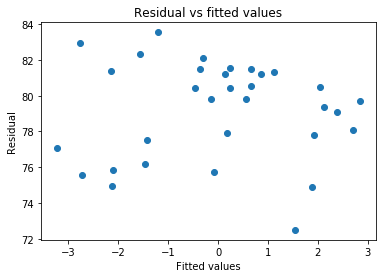

R2: [0.7189105]
R2 ajustado: [0.68879376]
RSE: [1.73701962]
VIF: 1.15341135469945

thinness, logGDP y Population


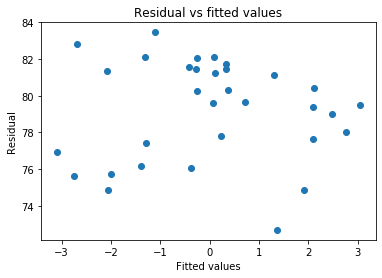

R2: [0.7250075]
R2 ajustado: [0.69554402]
RSE: [1.71807781]
VIF: 1.0145367190111019

thinness, logGDP y BMI


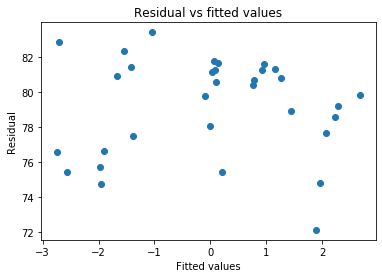

R2: [0.75083603]
R2 ajustado: [0.72413989]
RSE: [1.63540391]
VIF: 1.2911915957206712


In [151]:
variablesV3 = ['percentage expenditure', 'GDP', 'Income composition of resources', 'Hepatitis B', 'Schooling', 'Alcohol', 'Diphtheria', 'Population', 'BMI']
for variable in variablesV3:
    print('')
    print(f'thinness, logGDP y {variable}')
    run_analysis(xs_developed[['thinness 5-9 years', 'logGDP', variable]], ys_developed.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs_developed[['thinness 5-9 years', 'logGDP', variable]].to_numpy(),2))



thinness, logGDP, Alcohol y percentage expenditure


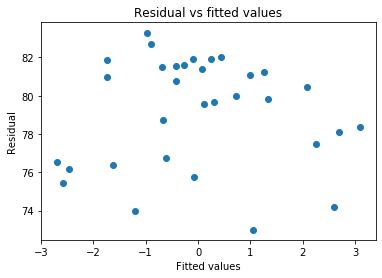

R2: [0.77332707]
R2 ajustado: [0.73974589]
RSE: [1.55984785]
VIF: 5.396815872503848

thinness, logGDP, Alcohol y GDP


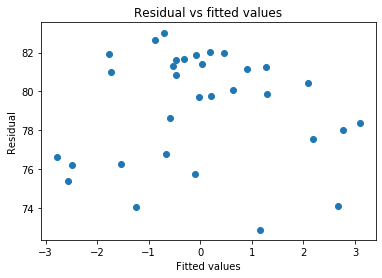

R2: [0.77305192]
R2 ajustado: [0.73942999]
RSE: [1.56079427]
VIF: 6.98491678379436

thinness, logGDP, Alcohol y Income composition of resources


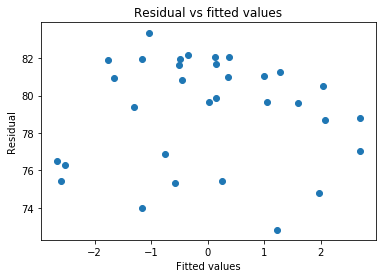

R2: [0.78700652]
R2 ajustado: [0.75545193]
RSE: [1.51204796]
VIF: 4.974714090106137

thinness, logGDP, Alcohol y Hepatitis B


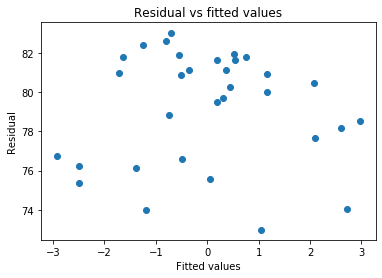

R2: [0.77820504]
R2 ajustado: [0.74534653]
RSE: [1.5429727]
VIF: 1.2120506658684358

thinness, logGDP, Alcohol y Schooling


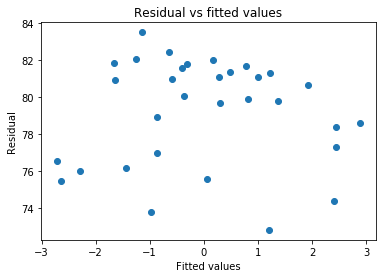

R2: [0.77987025]
R2 ajustado: [0.74725844]
RSE: [1.53716956]
VIF: 1.5785532881716318

thinness, logGDP, Alcohol y Diphtheria


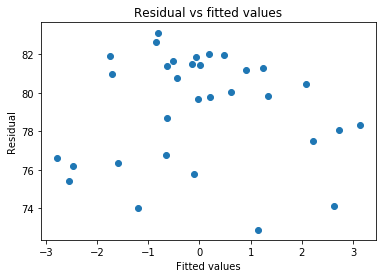

R2: [0.77307767]
R2 ajustado: [0.73945954]
RSE: [1.56070574]
VIF: 1.1534114215085811

thinness, logGDP, Alcohol y Population


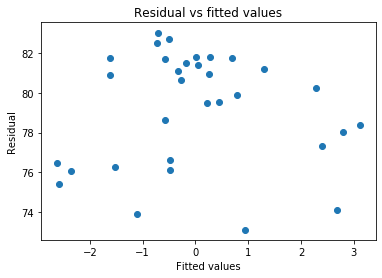

R2: [0.78153098]
R2 ajustado: [0.7491652]
RSE: [1.53136013]
VIF: 1.0180100262629586

thinness, logGDP, Alcohol y BMI


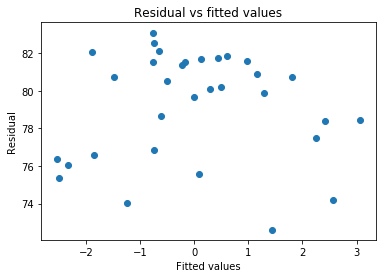

R2: [0.78498597]
R2 ajustado: [0.75313204]
RSE: [1.51920298]
VIF: 1.441968544002838

thinness, logGDP, Alcohol y Measles


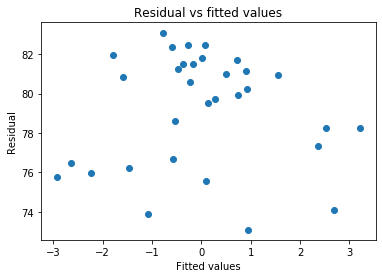

R2: [0.78988346]
R2 ajustado: [0.75875508]
RSE: [1.50180148]
VIF: 1.0506871618402265

thinness, logGDP, Alcohol y Polio


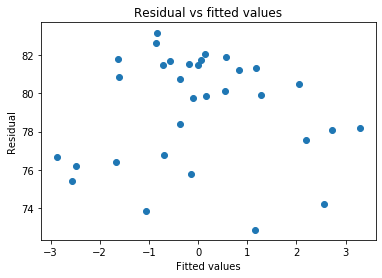

R2: [0.77401735]
R2 ajustado: [0.74053844]
RSE: [1.55747094]
VIF: 1.048400540796033

thinness, logGDP, Alcohol y Total expenditure


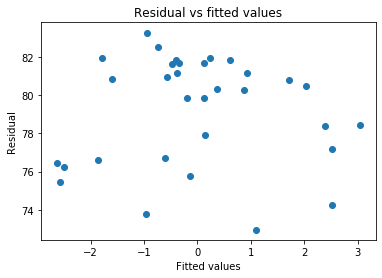

R2: [0.77880879]
R2 ajustado: [0.74603972]
RSE: [1.54087122]
VIF: 1.764649116351539

thinness, logGDP, Alcohol y infant deaths


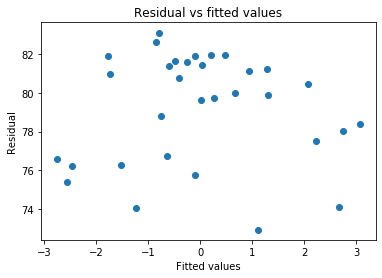

R2: [0.77305482]
R2 ajustado: [0.73943331]
RSE: [1.5607843]
VIF: 1.3651629713481959

thinness, logGDP, Alcohol y under-five deaths


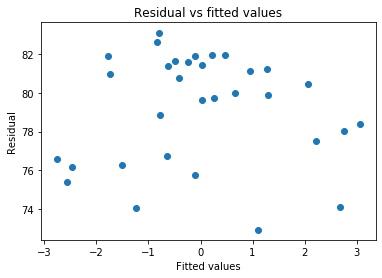

R2: [0.77310346]
R2 ajustado: [0.73948916]
RSE: [1.56061703]
VIF: 1.3563935837448606


In [152]:
variablesV4 = ['percentage expenditure', 'GDP', 'Income composition of resources', 'Hepatitis B', 'Schooling', 'Diphtheria', 'Population', 'BMI', 'Measles', 'Polio', 'Total expenditure', 'infant deaths', 'under-five deaths']
for variable in variablesV4:
    print('')
    print(f'thinness, logGDP, Alcohol y {variable}')
    run_analysis(xs_developed[['thinness 5-9 years', 'logGDP', 'Alcohol', variable]], ys_developed.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs_developed[['thinness 5-9 years', 'logGDP', 'Alcohol', variable]].to_numpy(),3))

In [153]:
correlaciones_developed

Life expectancy                    1.000000
Adult Mortality                    0.883067
thinness 5-9 years                 0.721003
thinness  1-19 years               0.713838
logGDP                             0.693826
percentage expenditure             0.643915
GDP                                0.643602
Income composition of resources    0.558930
Hepatitis B                        0.432332
Schooling                          0.379213
Alcohol                            0.345349
Diphtheria                         0.292043
Population                         0.179084
BMI                                0.164733
Measles                            0.155579
Polio                              0.102560
Total expenditure                  0.098335
infant deaths                      0.054296
under-five deaths                  0.049539
HIV/AIDS                                NaN
Name: Life expectancy, dtype: float64


thinness, logGDP, Alcohol, Measles y percentage expenditure


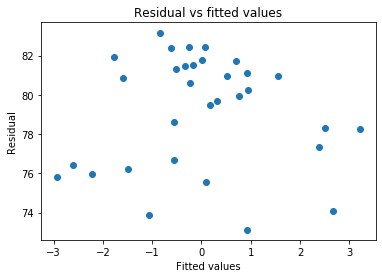

R2: [0.78993918]
R2 ajustado: [0.74954287]
RSE: [1.50160234]
VIF: 5.438226339272278

thinness, logGDP, Alcohol, Measles y GDP


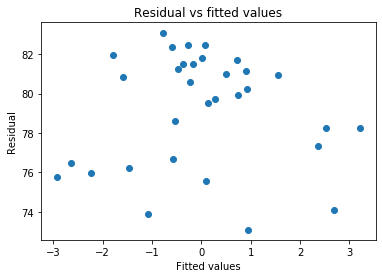

R2: [0.78988348]
R2 ajustado: [0.74947645]
RSE: [1.50180142]
VIF: 7.016161557951004

thinness, logGDP, Alcohol, Measles y Income composition of resources


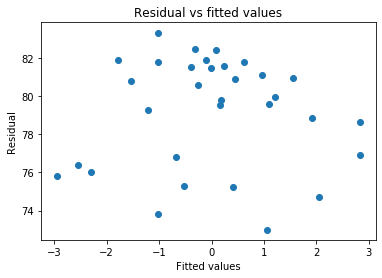

R2: [0.80271196]
R2 ajustado: [0.76477195]
RSE: [1.45523384]
VIF: 4.982956242558512

thinness, logGDP, Alcohol, Measles y Hepatitis B


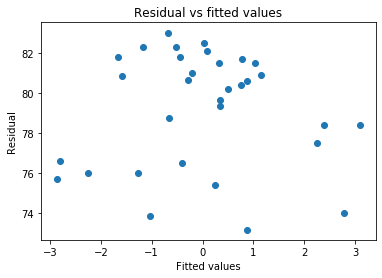

R2: [0.79568157]
R2 ajustado: [0.75638957]
RSE: [1.48093562]
VIF: 1.213080527180139

thinness, logGDP, Alcohol, Measles y Schooling


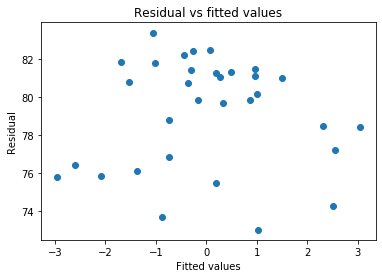

R2: [0.79423698]
R2 ajustado: [0.75466716]
RSE: [1.48616173]
VIF: 1.6082605061109385

thinness, logGDP, Alcohol, Measles y Diphtheria


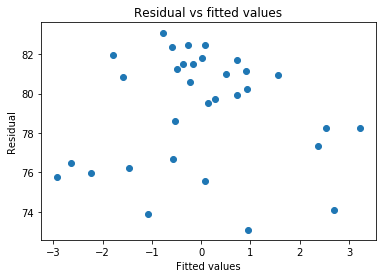

R2: [0.78988487]
R2 ajustado: [0.74947812]
RSE: [1.50179644]
VIF: 1.1589427673068033

thinness, logGDP, Alcohol, Measles y Population


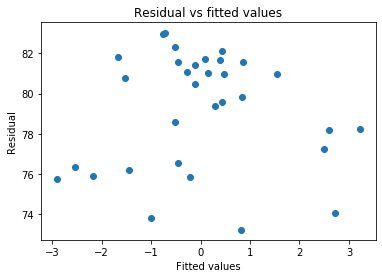

R2: [0.7948312]
R2 ajustado: [0.75537566]
RSE: [1.48401423]
VIF: 1.0517811739463554

thinness, logGDP, Alcohol, Measles y BMI


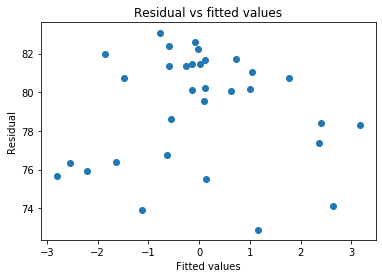

R2: [0.7925724]
R2 ajustado: [0.75268248]
RSE: [1.49216098]
VIF: 1.9143127901774397

thinness, logGDP, Alcohol, Measles y Polio


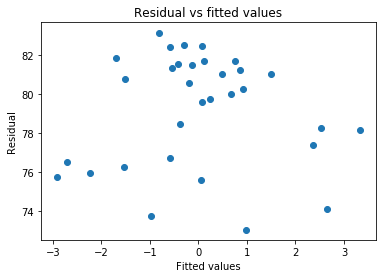

R2: [0.79022986]
R2 ajustado: [0.74988944]
RSE: [1.50056305]
VIF: 1.0603255873591908

thinness, logGDP, Alcohol, Measles y Total expenditure


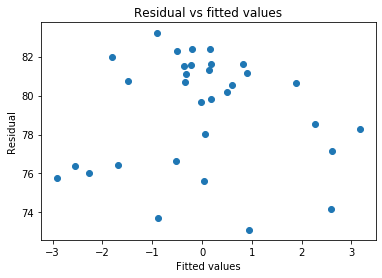

R2: [0.79339199]
R2 ajustado: [0.75365968]
RSE: [1.48921015]
VIF: 1.7979717238743391

thinness, logGDP, Alcohol, Measles y infant deaths


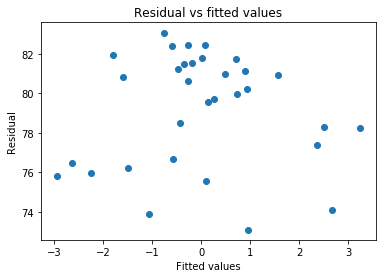

R2: [0.78993778]
R2 ajustado: [0.7495412]
RSE: [1.50160734]
VIF: 1.386923292973691

thinness, logGDP, Alcohol, Measles y under-five deaths


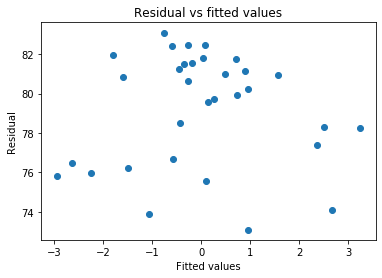

R2: [0.78993895]
R2 ajustado: [0.74954259]
RSE: [1.50160317]
VIF: 1.3851563481664497


In [154]:
variablesV5 = ['percentage expenditure', 'GDP', 'Income composition of resources', 'Hepatitis B', 'Schooling', 'Diphtheria', 'Population', 'BMI', 'Polio', 'Total expenditure', 'infant deaths', 'under-five deaths']
for variable in variablesV5:
    print('')
    print(f'thinness, logGDP, Alcohol, Measles y {variable}')
    run_analysis(xs_developed[['thinness 5-9 years', 'logGDP', 'Alcohol', 'Measles', variable]], ys_developed.values.reshape(-1, 1))
    print('VIF:', variance_inflation_factor(xs_developed[['thinness 5-9 years', 'logGDP', 'Alcohol', 'Measles', variable]].to_numpy(),4))

## Final?
### 'thinness 5-9 years', 'logGDP', 'Alcohol', 'Measles'

# Agregamos columna de datos externos

In [ ]:
df_joined = pd.read_csv("../dataset-folder/df_final.csv")

In [ ]:
df_joined=df_joined[["Country","FactValueNumeric"]]

In [ ]:
df_final = pd.merge(xs, df_joined, how='left', left_on='Country', right_on='Country')

In [ ]:
df_final

In [ ]:
for column in df_final:
    df_final[[column]] = df_final[[column]].fillna(df_final.median())

In [ ]:

run_analysis(df_final[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol','under-five deaths','FactValueNumeric']], ys.values.reshape(-1, 1))

In [ ]:
df_final["homicides(logaritmic)"] = np.log(df_final["FactValueNumeric"])



In [ ]:
run_analysis(df_final[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol','under-five deaths',"homicides(logaritmic)"]], ys.values.reshape(-1, 1))


In [ ]:
coef = run_analysis(df_final[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol','under-five deaths',"homicides(logaritmic)"]], ys.values.reshape(-1, 1))
print(coef)